# Analysis for missing or errorneus data

Starting on May data only due to performance. This notebook is for the assessment of the given dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read may dataset

In [2]:
may_data = pd.read_csv("may_data.csv", parse_dates=["start_time","end_time"])
may_data.head()

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Month,duration,day
0,628548,2016-05-31 23:57:00,2016-06-01 00:14:00,22,282,May St & Taylor St,Halsted St & Maxwell St,609,Subscriber,5,0 days 00:17:00,31
1,628549,2016-05-31 23:57:00,2016-06-01 00:14:00,22,282,May St & Taylor St,Halsted St & Maxwell St,1207,Subscriber,5,0 days 00:17:00,31
2,628550,2016-05-31 23:56:00,2016-06-01 00:15:00,90,320,Millennium Park,Loomis St & Lexington St,4369,Subscriber,5,0 days 00:19:00,31
3,628551,2016-05-31 23:55:00,2016-06-01 00:18:00,174,273,Canal St & Madison St,Michigan Ave & 18th St,2703,Subscriber,5,0 days 00:23:00,31
4,628552,2016-05-31 23:55:00,2016-06-01 00:14:00,90,22,Millennium Park,May St & Taylor St,3828,Subscriber,5,0 days 00:19:00,31


Lets get an overview. It seems like there is not missing data.

In [4]:
may_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363319 entries, 0 to 363318
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          363319 non-null  int64         
 1   start_time          363319 non-null  datetime64[ns]
 2   end_time            363319 non-null  datetime64[ns]
 3   start_station_id    363319 non-null  int64         
 4   end_station_id      363319 non-null  int64         
 5   start_station_name  363319 non-null  object        
 6   end_station_name    363319 non-null  object        
 7   bike_id             363319 non-null  int64         
 8   user_type           363319 non-null  object        
 9   Month               363319 non-null  int64         
 10  duration            363319 non-null  object        
 11  day                 363319 non-null  int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory usage: 33.3+ MB


Convert strings to timedelta.

In [3]:
may_data["duration"] = may_data["duration"].apply(lambda x:pd.Timedelta(x))

Examine the duration for outliers

In [4]:
may_data["duration_in_minutes"] = may_data["duration"].apply(lambda x:x.total_seconds()/60)

In [5]:
may_data["duration_in_minutes"].describe()

count    363319.000000
mean         17.796925
std          34.175323
min           1.000000
25%           7.000000
50%          13.000000
75%          21.000000
max        1432.000000
Name: duration_in_minutes, dtype: float64

In [6]:
sorted_data = may_data.sort_values(by="duration_in_minutes")
sorted_data.head()

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Month,duration,day,duration_in_minutes
67580,696128,2016-05-27 17:02:00,2016-05-27 17:03:00,195,195,Columbus Dr & Randolph St,Columbus Dr & Randolph St,1944,Customer,5,0 days 00:01:00,27,1.0
273518,902066,2016-05-11 06:41:00,2016-05-11 06:42:00,255,255,Indiana Ave & Roosevelt Rd,Indiana Ave & Roosevelt Rd,925,Subscriber,5,0 days 00:01:00,11,1.0
134581,763129,2016-05-23 07:20:00,2016-05-23 07:21:00,66,91,Clinton St & Lake St,Clinton St & Washington Blvd,2158,Subscriber,5,0 days 00:01:00,23,1.0
295197,923745,2016-05-08 12:58:00,2016-05-08 12:59:00,403,403,Wentworth Ave & 33rd St,Wentworth Ave & 33rd St,1819,Subscriber,5,0 days 00:01:00,8,1.0
106337,734885,2016-05-24 18:41:00,2016-05-24 18:42:00,56,56,Desplaines St & Kinzie St,Desplaines St & Kinzie St,5148,Subscriber,5,0 days 00:01:00,24,1.0


In [18]:
sorted_data.tail()

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Month,duration,day,duration_in_minutes
157985,786533,2016-05-21 16:23:00,2016-05-22 15:52:00,69,90,Damen Ave & Pierce Ave,Millennium Park,2776,Customer,5,0 days 23:29:00,21,1409.0
46287,674835,2016-05-29 10:53:00,2016-05-30 10:30:00,254,162,Pine Grove Ave & Irving Park Rd,Damen Ave & Wellington Ave,5051,Customer,5,0 days 23:37:00,29,1417.0
99630,728178,2016-05-25 08:59:00,2016-05-26 08:36:00,31,77,Franklin St & Chicago Ave,Clinton St & Madison St,4237,Subscriber,5,0 days 23:37:00,25,1417.0
120091,748639,2016-05-23 21:16:00,2016-05-24 21:00:00,36,35,Franklin St & Jackson Blvd,Streeter Dr & Grand Ave,2115,Customer,5,0 days 23:44:00,23,1424.0
120147,748695,2016-05-23 21:08:00,2016-05-24 21:00:00,36,35,Franklin St & Jackson Blvd,Streeter Dr & Grand Ave,3569,Customer,5,0 days 23:52:00,23,1432.0


When looking at these values it seems like the minimum recored time is 1 minute. This is due to trips shorter than 60 seconds being filtered out by divvybikes. There does not seem to be a specific upper limit. However all rentals are canceled before the 24h mark. So it seems likely, that very high and very low duration sets were incorrectly recorded. 

In [26]:
#remove data with same start and end station, that are shorter or equal to one minutes
filtered_data = may_data[ ~((may_data["start_station_name"] == may_data["end_station_name"]) & (may_data["duration_in_minutes"] <= 1.0)) ]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362444 entries, 0 to 363318
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   Unnamed: 0           362444 non-null  int64          
 1   start_time           362444 non-null  datetime64[ns] 
 2   end_time             362444 non-null  datetime64[ns] 
 3   start_station_id     362444 non-null  int64          
 4   end_station_id       362444 non-null  int64          
 5   start_station_name   362444 non-null  object         
 6   end_station_name     362444 non-null  object         
 7   bike_id              362444 non-null  int64          
 8   user_type            362444 non-null  object         
 9   Month                362444 non-null  int64          
 10  duration             362444 non-null  timedelta64[ns]
 11  day                  362444 non-null  int64          
 12  duration_in_minutes  362444 non-null  float64        
dtyp

There is no pattern to dermine whether long bike rentals are really errorneus. Maybe people really rent the bikes for up to 24 hours.

(array([    0.,   521.,  6216., 12652., 17257., 19397., 19818., 19431.,
        18753., 17763., 16656., 15485., 14689., 13611., 12712., 12309.,
        11375., 10710., 10072.,  9695.,  9208.,  8653.,  8078.,  7398.,
         7072.,  6391.,  5592.,  5109.,  4603.,  3740.,  3116.,  2632.,
         2192.,  1952.,  1719.,  1438.,  1366.,  1217.,  1058.,   988.,
          940.,   862.,   757.,   672.,   672.,   610.,   603.,   559.,
          477.,   476.,   499.,   521.,   406.,   419.,   363.,   366.,
          357.,   313.,   316.,   578.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60.]),
 <BarContainer object of 60 artists>)

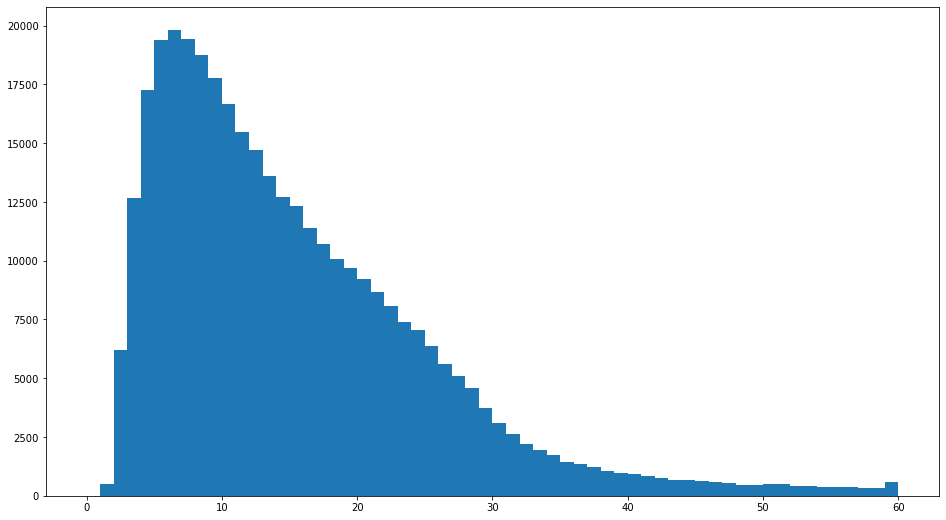

In [49]:
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(filtered_data["duration_in_minutes"],bins=60,range=[0,60])

Looking for dupilcates:

In [61]:
may_data.groupby("Unnamed: 0").size()

Unnamed: 0
628548    1
628549    1
628550    1
628551    1
628552    1
         ..
991862    1
991863    1
991864    1
991865    1
991866    1
Length: 363319, dtype: int64